In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
plan1=pd.read_csv('Data/Plant_1_Generation_Data/Plant_1_Generation_Data.csv')
wether_plant1=pd.read_csv('Data/Plant_1_Weather_Sensor_Data.csv')



In [4]:
plan1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [5]:
plan1['DATE_TIME'] = pd.to_datetime(plan1['DATE_TIME'], format='%d-%m-%Y %H:%M', errors='coerce')
wether_plant1['DATE_TIME'] = pd.to_datetime(wether_plant1['DATE_TIME'], errors='coerce')

In [6]:
wether_plant1

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [7]:
data1 = pd.merge(wether_plant1, plan1, on='DATE_TIME', how='inner')
data1.set_index('DATE_TIME', inplace=True, drop=False)

In [8]:
data1=data1[['DATE_TIME','IRRADIATION','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','DAILY_YIELD']]

In [9]:
data=pd.read_csv('Data/Generation_data.csv')

In [10]:
data

,MODULE_TEMP,Amb_Temp,WIND_Speed,IRR (W/m2),DC Current in Amps,AC Ir in Amps,AC Iy in Amps,AC Ib in Amps,AC Power in Watts
0,18.76750,17.85190,47.605060,6.388252,0.60,8.6,8.6,8.7,3233
1,18.61500,18.59573,64.266840,12.776500,0.66,9.6,9.7,10.0,4504
2,18.92000,18.59573,85.689120,17.035340,4.74,11.9,12.0,12.4,6614
3,18.92000,18.59573,83.308860,25.553010,8.18,14.8,14.7,14.7,8971
4,19.07250,18.59573,57.126080,36.200090,26.66,18.6,18.4,18.5,12071
...,...,...,...,...,...,...,...,...,...
118860,30.96750,31.24082,59.268310,38.329510,27.64,18.9,18.7,18.7,12789
118861,30.66249,30.49699,59.268310,31.941260,15.30,16.0,15.9,16.2,10727
118862,29.74750,30.49699,59.268310,27.682420,6.42,13.9,13.9,14.5,9081
118863,29.13750,30.49699,59.268310,19.164760,0.66,12.3,12.2,12.4,7360


In [11]:
import pandas as pd

# Assuming 'data' is your DataFrame and it has 95092 rows.
# Create timestamps for every 15 minutes from July 30, 2018, to January 1, 2024
timestamps = pd.date_range(start='2020-08-10 20:00:00', end='2024-01-01', freq='15T')

# Check the number of timestamps generated
print(f'Number of timestamps generated: {len(timestamps)}')

# Ensure the number of timestamps matches the number of rows in the DataFrame
if len(timestamps) == 118865:
    # Add the new column
    data['Data_time'] = timestamps
    print("Data_time column added successfully.")
else:
    print("The number of timestamps does not match the number of rows in the DataFrame.")
    print(f'Expected: 95092, Got: {len(timestamps)}')



Number of timestamps generated: 118865
Data_time column added successfully.


C:\Users\Admin\AppData\Local\Temp\ipykernel_1296\3575581464.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start='2020-08-10 20:00:00', end='2024-01-01', freq='15T')


In [12]:
data.set_index('Data_time', inplace=True, drop=False)


In [13]:
data.describe()

,MODULE_TEMP,Amb_Temp,WIND_Speed,IRR (W/m2),DC Current in Amps,AC Ir in Amps,AC Iy in Amps,AC Ib in Amps,AC Power in Watts,Data_time
count,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000,118865
mean,37.141972,22.961983,224.429052,428.093276,355.902071,172.329754,172.190557,172.351243,128081.179666,2022-04-21 22:00:00.000000512
min,8.855000,10.413610,0.238025,2.129417,0.600000,1.400000,1.400000,1.500000,394.000000,2020-08-10 20:00:00
25%,26.697500,20.083390,28.325010,155.447500,126.180000,65.600000,65.500000,65.600000,47737.000000,2021-06-16 09:00:00
50%,36.457500,23.058700,59.030280,357.742100,298.600000,150.000000,150.000000,150.100000,110673.000000,2022-04-21 22:00:00
75%,46.675000,26.034020,442.727100,687.801800,576.320000,277.700000,277.400000,277.600000,206594.000000,2023-02-25 11:00:00
max,72.447500,34.959970,597.443500,1494.851000,995.679988,461.200000,461.100000,461.700000,332614.000000,2024-01-01 00:00:00
std,12.017936,3.921594,230.238430,313.280827,264.863384,120.507508,120.448101,120.503308,91193.677193,NaN


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118865 entries, 2020-08-10 20:00:00 to 2024-01-01 00:00:00
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   MODULE_TEMP         118865 non-null  float64       
 1   Amb_Temp            118865 non-null  float64       
 2   WIND_Speed          118865 non-null  float64       
 3   IRR (W/m2)          118865 non-null  float64       
 4   DC Current in Amps  118865 non-null  float64       
 5   AC Ir in Amps       118865 non-null  float64       
 6   AC Iy in Amps       118865 non-null  float64       
 7   AC Ib in Amps       118865 non-null  float64       
 8   AC Power in Watts   118865 non-null  int64         
 9   Data_time           118865 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 10.0 MB


In [15]:
data.isnull().sum()

MODULE_TEMP           0
Amb_Temp              0
WIND_Speed            0
IRR (W/m2)            0
DC Current in Amps    0
AC Ir in Amps         0
AC Iy in Amps         0
AC Ib in Amps         0
AC Power in Watts     0
Data_time             0
dtype: int64

In [16]:
data.shape

(118865, 10)

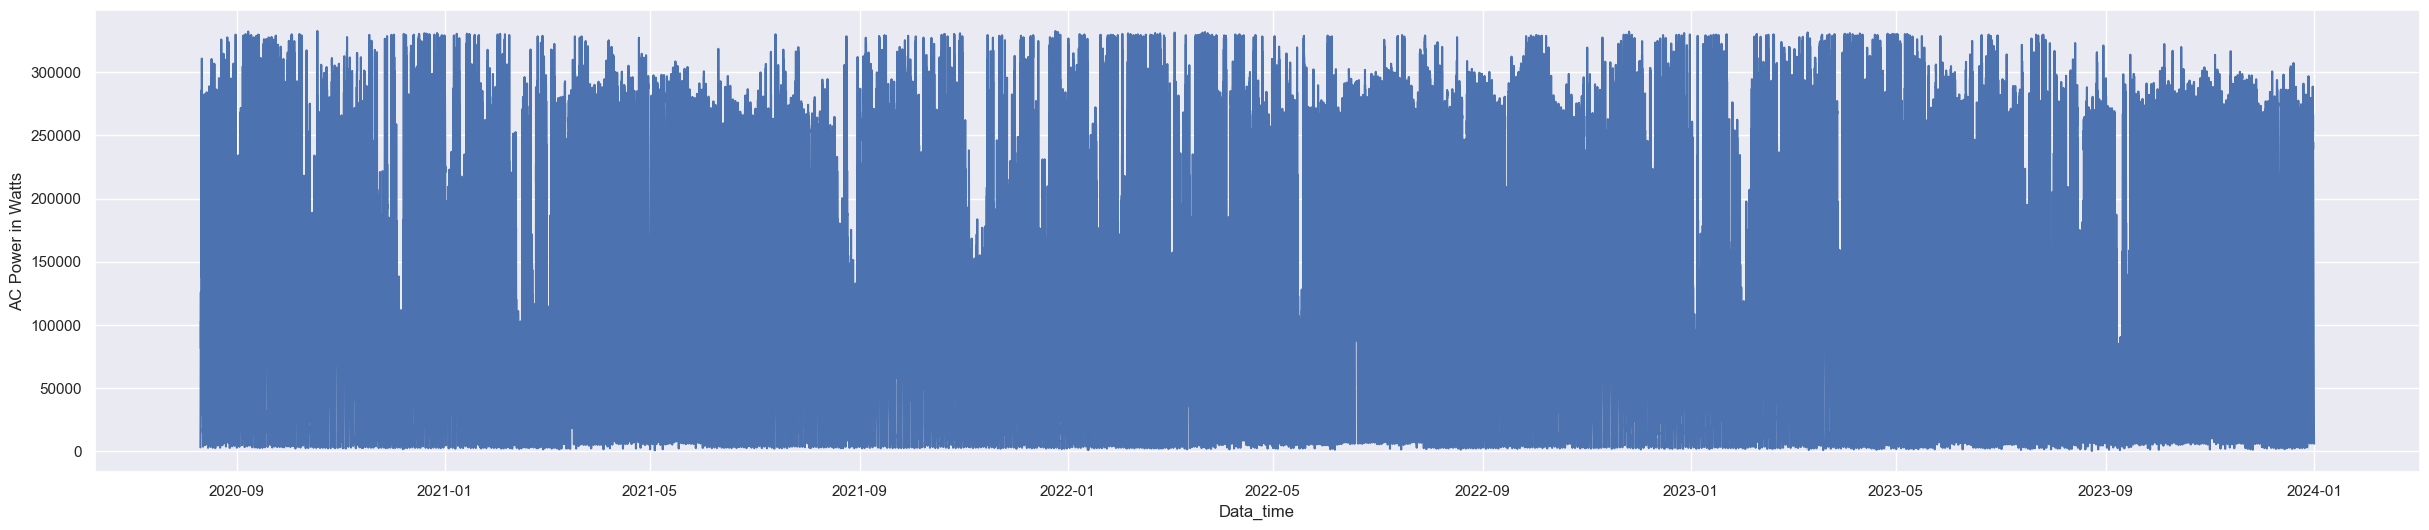

In [17]:
sb.set(rc={'figure.figsize':(30, 6)})
sb.lineplot(data['AC Power in Watts'])
plt.show()

In [18]:
data.columns

Index(['MODULE_TEMP', 'Amb_Temp', 'WIND_Speed', 'IRR (W/m2)',
       'DC Current in Amps', 'AC Ir in Amps', 'AC Iy in Amps', 'AC Ib in Amps',
       'AC Power in Watts', 'Data_time'],
      dtype='object')

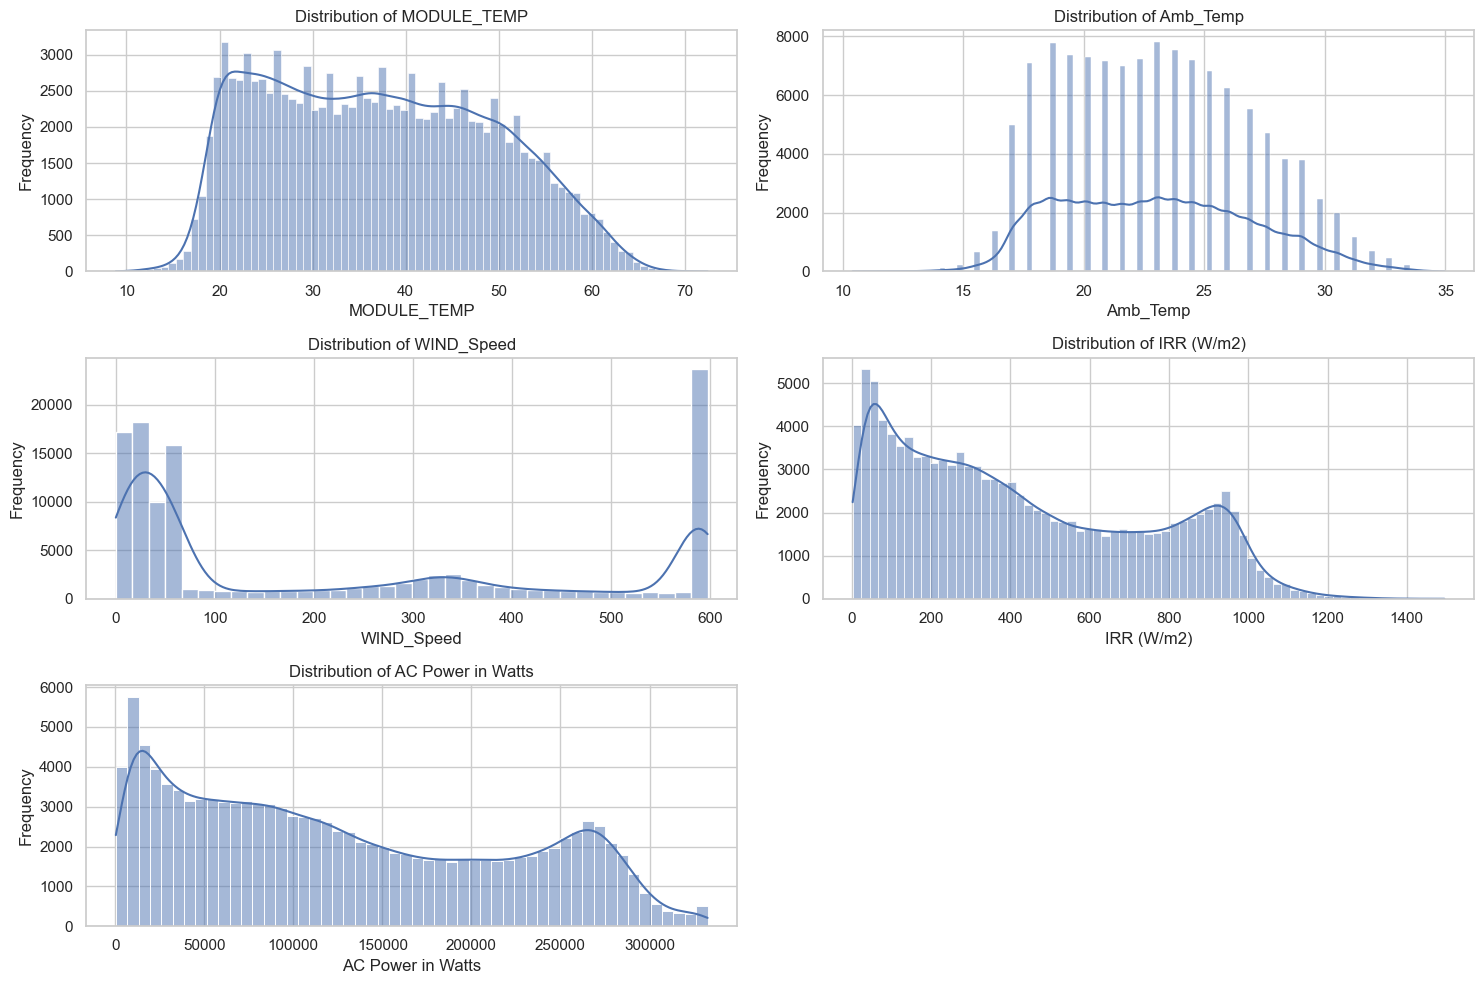

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# List of columns to visualize
columns_to_plot = ['MODULE_TEMP', 'Amb_Temp', 'WIND_Speed', 'IRR (W/m2)', 'AC Power in Watts']

# Create histograms for selected features
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()






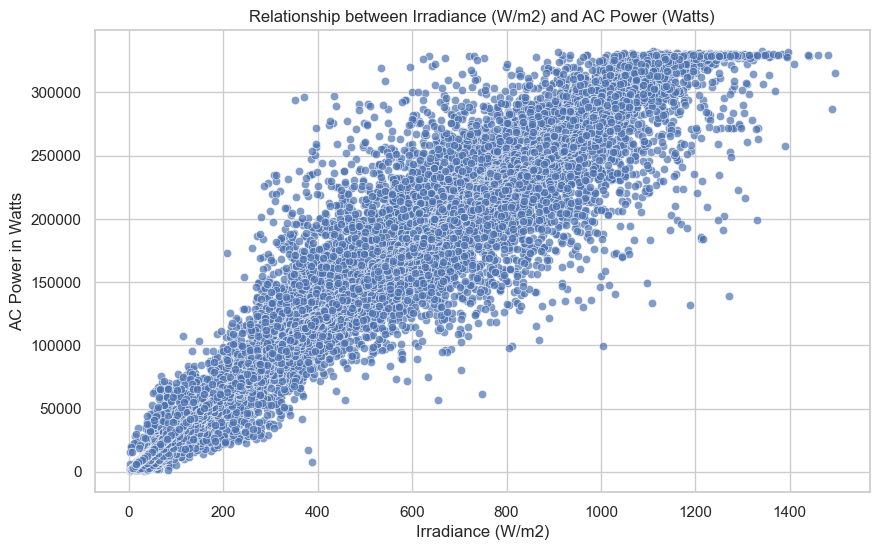

In [20]:
# Scatter plot: Relationship between Irradiance and AC Power
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['IRR (W/m2)'], y=data['AC Power in Watts'], alpha=0.7)
plt.title('Relationship between Irradiance (W/m2) and AC Power (Watts)')
plt.xlabel('Irradiance (W/m2)')
plt.ylabel('AC Power in Watts')
plt.show()


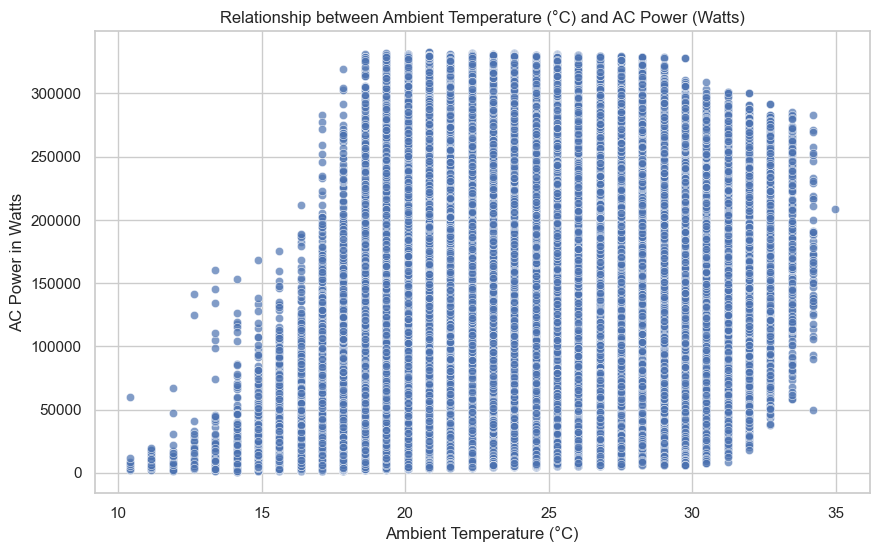

In [21]:
# Scatter plot: Relationship between Ambient Temperature and AC Power
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Amb_Temp'], y=data['AC Power in Watts'], alpha=0.7)
plt.title('Relationship between Ambient Temperature (°C) and AC Power (Watts)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('AC Power in Watts')
plt.show()

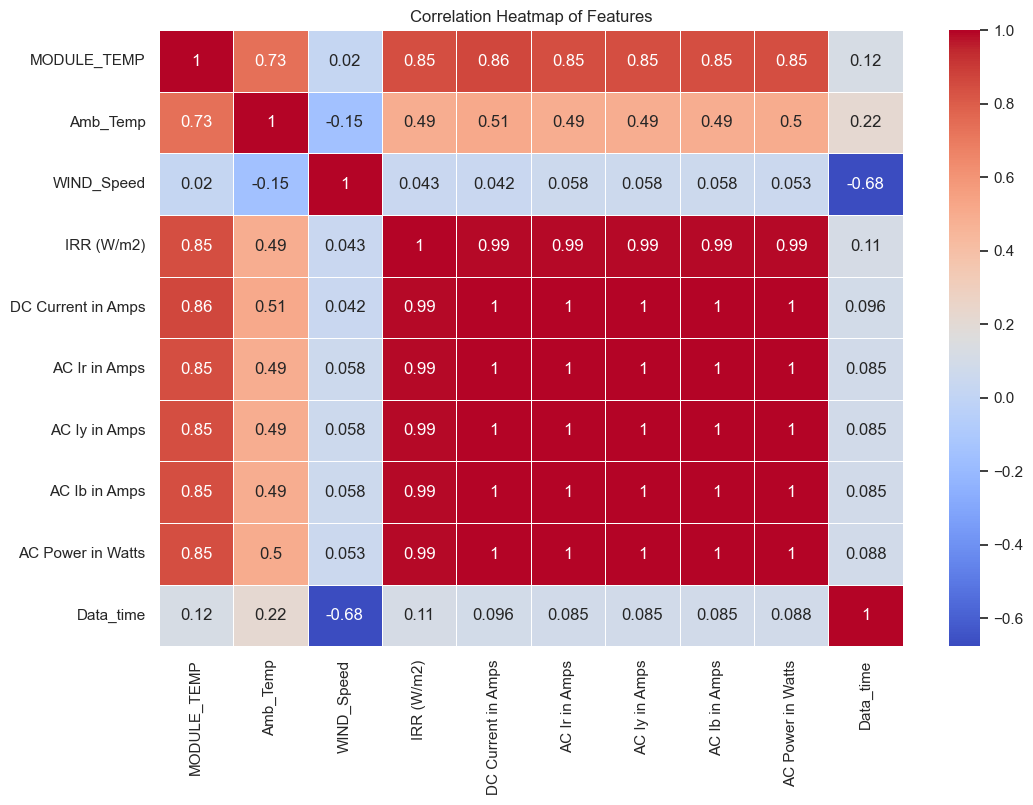

In [22]:
correlation_matrix = data.corr()

# Plot a heatmap to visualize the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

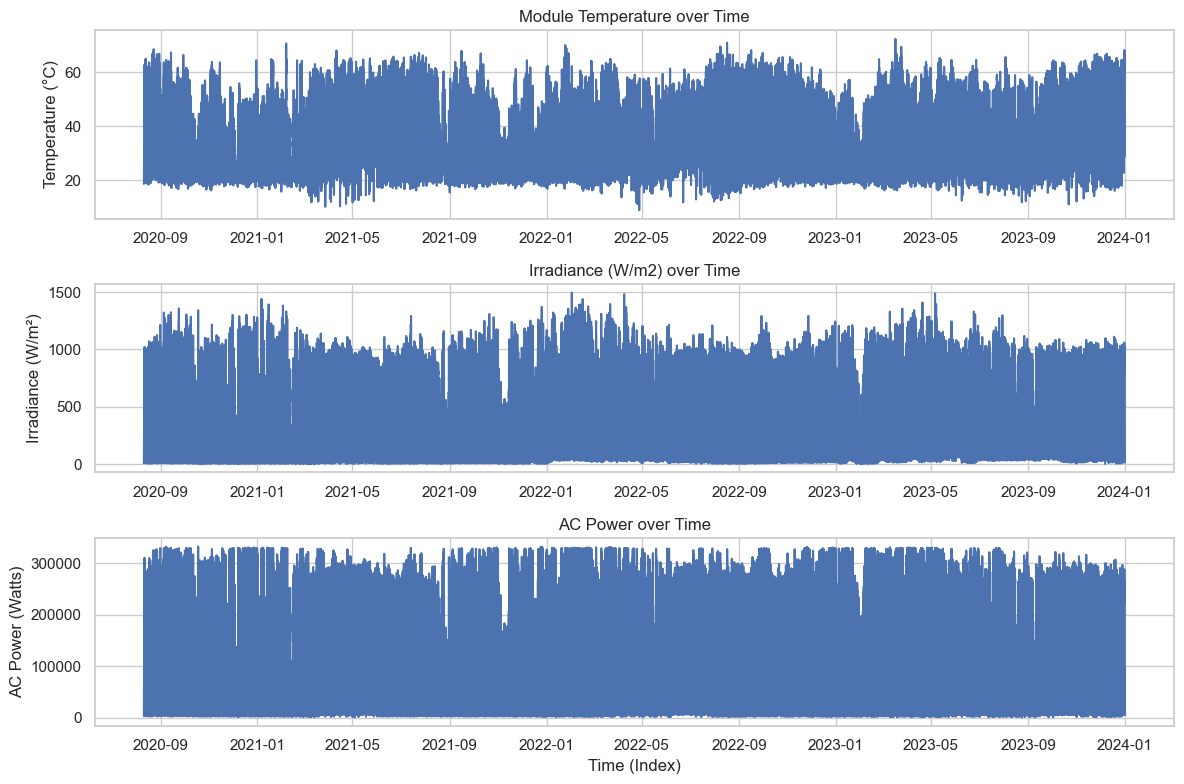

In [23]:
# Create line plots for key features to visually inspect for stationarity
plt.figure(figsize=(12, 8))

# Plot Module Temperature over time
plt.subplot(3, 1, 1)
plt.plot(data['MODULE_TEMP'])
plt.title('Module Temperature over Time')
plt.ylabel('Temperature (°C)')

# Plot Irradiance over time
plt.subplot(3, 1, 2)
plt.plot(data['IRR (W/m2)'])
plt.title('Irradiance (W/m2) over Time')
plt.ylabel('Irradiance (W/m²)')

# Plot AC Power over time
plt.subplot(3, 1, 3)
plt.plot(data['AC Power in Watts'])
plt.title('AC Power over Time')
plt.ylabel('AC Power (Watts)')
plt.xlabel('Time (Index)')

plt.tight_layout()
plt.show()


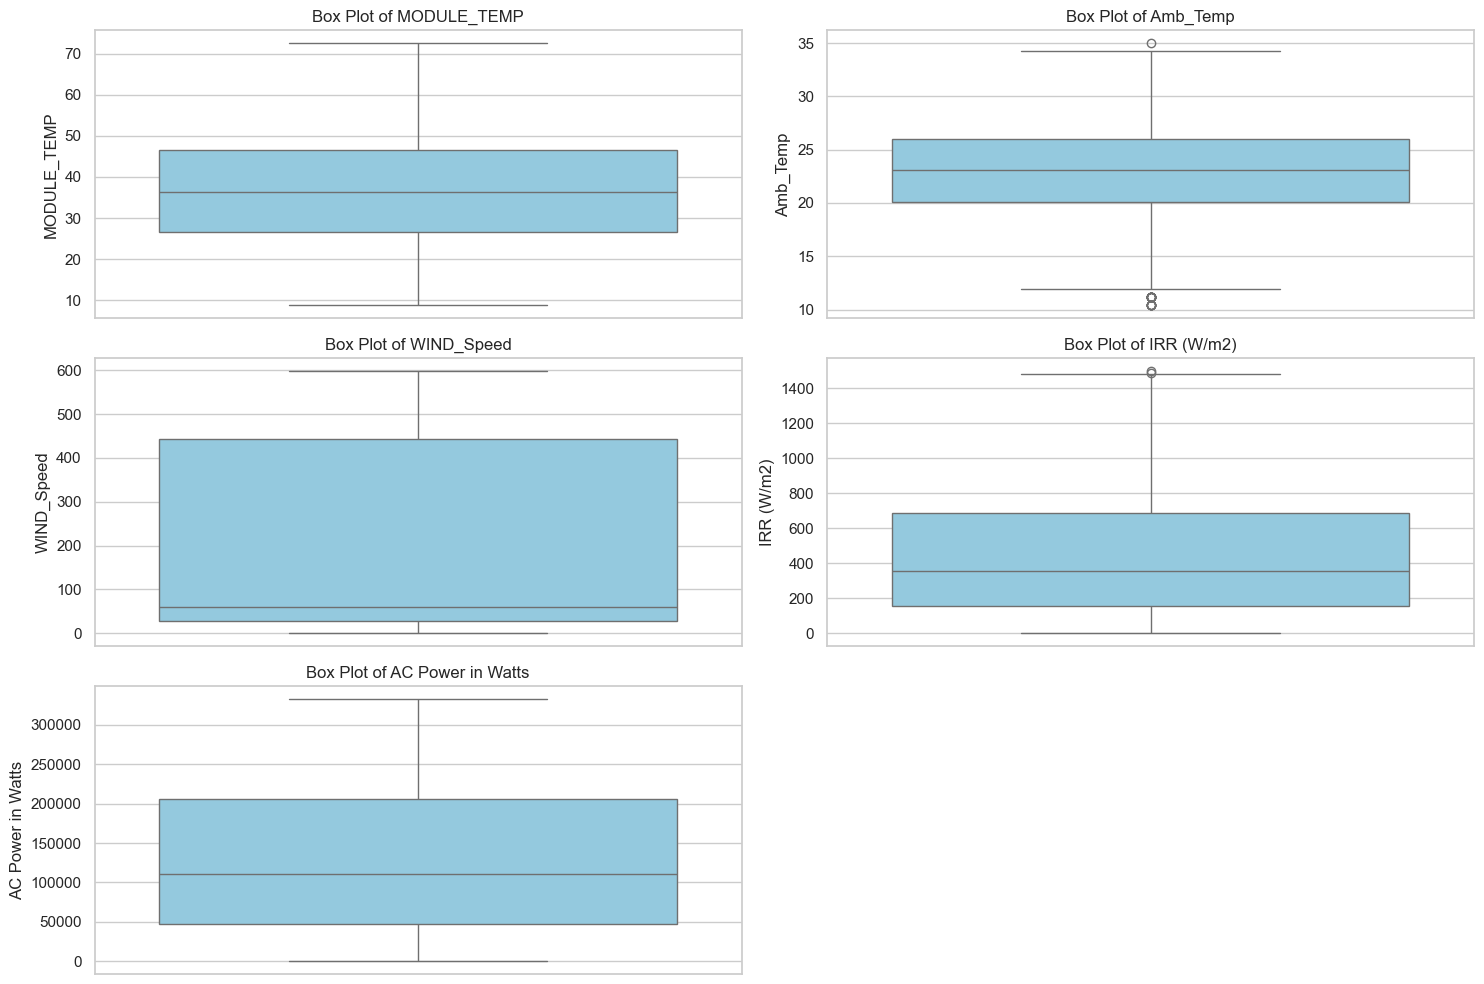

In [24]:

# Set plot style
sns.set(style="whitegrid")


# List of columns for which to plot box plots
columns_to_plot = ['MODULE_TEMP', 'Amb_Temp', 'WIND_Speed', 'IRR (W/m2)', 'AC Power in Watts']

# Create box plots for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=data[column], orient='v', color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


# Feature Selection

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [26]:
selcted_data=data[['MODULE_TEMP', 'Amb_Temp', 'WIND_Speed', 'IRR (W/m2)',
       'DC Current in Amps', 'AC Ir in Amps', 'AC Iy in Amps', 'AC Ib in Amps',
       'AC Power in Watts',]]

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

# Assuming you have your data in a DataFrame 'data'
X = selcted_data.iloc[:, :-1]  # Features
y = selcted_data.iloc[:, -1]   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the ExtraTreesRegressor model
model = ExtraTreesRegressor()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Print the feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

# Select top N features (e.g., top 10)
top_n_features = X.columns[importances.argsort()[-10:]]
print("Top 10 features:", top_n_features)

MODULE_TEMP: 0.005982375629069321
Amb_Temp: 7.70565205429381e-05
WIND_Speed: 5.761660960059392e-05
IRR (W/m2): 0.09433649592080863
DC Current in Amps: 0.23797075696160344
AC Ir in Amps: 0.226614114619084
AC Iy in Amps: 0.21145305299055306
AC Ib in Amps: 0.22350853074873797
Top 10 features: Index(['WIND_Speed', 'Amb_Temp', 'MODULE_TEMP', 'IRR (W/m2)', 'AC Iy in Amps',
       'AC Ib in Amps', 'AC Ir in Amps', 'DC Current in Amps'],
      dtype='object')


# feture scaling and cross validation

In [28]:
featuresele_data=data[['IRR (W/m2)','MODULE_TEMP','Amb_Temp','AC Power in Watts']]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming X is your feature set and y is the target (AC Power in Watts)
X = featuresele_data[['MODULE_TEMP', 'Amb_Temp', 'IRR (W/m2)']]
y = featuresele_data['AC Power in Watts']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Option 1: Min-Max Scaling
scaler = MinMaxScaler()

# Option 2: Standardization (uncomment this if you prefer Standardization)
# scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are ready for model training


# elasticnet

In [30]:
"""elasticnet_params = {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.7, 1.0]}
# ElasticNet with Grid Search
elasticnet_model = ElasticNet()
elasticnet_grid = GridSearchCV(elasticnet_model, elasticnet_params, cv=5, scoring='r2')
elasticnet_grid.fit(X_train_scaled, y_train)
# Make predictions on the test data
print(f"Best ElasticNet alpha: {elasticnet_grid.best_params_['alpha']} and l1_ratio: {elasticnet_grid.best_params_['l1_ratio']} with R2: {elasticnet_grid.best_score_}")"""

'elasticnet_params = {\'alpha\': [0.01, 0.1, 1.0, 10.0], \'l1_ratio\': [0.1, 0.5, 0.7, 1.0]}\n# ElasticNet with Grid Search\nelasticnet_model = ElasticNet()\nelasticnet_grid = GridSearchCV(elasticnet_model, elasticnet_params, cv=5, scoring=\'r2\')\nelasticnet_grid.fit(X_train_scaled, y_train)\n# Make predictions on the test data\nprint(f"Best ElasticNet alpha: {elasticnet_grid.best_params_[\'alpha\']} and l1_ratio: {elasticnet_grid.best_params_[\'l1_ratio\']} with R2: {elasticnet_grid.best_score_}")'

In [31]:


# Initialize the ElasticNet model with a mix of L1 and L2 regularization
elasticnet_model = ElasticNet(alpha=0.01, l1_ratio=1.0)  # You can tune alpha and l1_ratio

# Fit the model to the training data
elasticnet_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_elasticnet = elasticnet_model.predict(X_test_scaled)

# Evaluate the model
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print(f"ElasticNet - Mean Squared Error (MSE): {mse_elasticnet}")
print(f"ElasticNet - R-squared: {r2_elasticnet}")


ElasticNet - Mean Squared Error (MSE): 159748003.82993224
ElasticNet - R-squared: 0.9808629232825122


# DecisionTreeRegressor

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution instead of grid
"""param_distributions = {
    'max_depth': randint(3, 10),
    'min_samples_leaf': randint(1, 10),
    'max_leaf_nodes': randint(10, 100),
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'splitter': ['best', 'random']
}

random_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state = 0), 
                                   param_distributions=param_distributions, 
                                   n_iter=10,  # Number of random combinations
                                   cv=3, 
                                   scoring='r2', 
                                   verbose=2)

random_search.fit(X_train_scaled, y_train)
print(random_search.best_params_)
print(f"Best DecisionTreeRegressor paramter: {random_search.best_params_} with R2: {random_search.best_score_}")"""

'param_distributions = {\n    \'max_depth\': randint(3, 10),\n    \'min_samples_leaf\': randint(1, 10),\n    \'max_leaf_nodes\': randint(10, 100),\n    \'min_weight_fraction_leaf\': [0.0, 0.1, 0.2],\n    \'splitter\': [\'best\', \'random\']\n}\n\nrandom_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state = 0), \n                                   param_distributions=param_distributions, \n                                   n_iter=10,  # Number of random combinations\n                                   cv=3, \n                                   scoring=\'r2\', \n                                   verbose=2)\n\nrandom_search.fit(X_train_scaled, y_train)\nprint(random_search.best_params_)\nprint(f"Best DecisionTreeRegressor paramter: {random_search.best_params_} with R2: {random_search.best_score_}")'

In [33]:

# import the regressor 
 
  
# create a regressor object 
DecisionTreeR = DecisionTreeRegressor(random_state=0,
    max_depth=8, 
    max_leaf_nodes=94, 
    min_samples_leaf=4, 
    min_weight_fraction_leaf=0.0, 
    splitter='best')  
  
# fit the regressor with X and Y data 
DecisionTreeR.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_DTpred = DecisionTreeR.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_DTpred)
r2 = r2_score(y_test, y_DTpred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 139479496.15808442
R-squared: 0.9832909973552129


# RandomForestRegressor

In [34]:
"""
param_grid={'bootstrap': [True],
    'max_depth': [3, 4, 5, 6, 7],
    'max_features': ['sqrt', 'log2', None],  # Removed 'auto'
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 17, 100]
            }
RandomForest = RandomForestRegressor()
rf_Grid = GridSearchCV(estimator = RandomForest, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4,scoring='r2')
rf_Grid.fit(X_train_scaled, y_train)
print(rf_Grid.best_params_)
"""

"\nparam_grid={'bootstrap': [True],\n    'max_depth': [3, 4, 5, 6, 7],\n    'max_features': ['sqrt', 'log2', None],  # Removed 'auto'\n    'min_samples_leaf': [1, 2, 4],\n    'min_samples_split': [2, 5, 10],\n    'n_estimators': [10, 17, 100]\n            }\nRandomForest = RandomForestRegressor()\nrf_Grid = GridSearchCV(estimator = RandomForest, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4,scoring='r2')\nrf_Grid.fit(X_train_scaled, y_train)\nprint(rf_Grid.best_params_)\n"

In [35]:

# Fitting Random Forest Regression to the dataset
RandomForest = RandomForestRegressor( random_state=0, oob_score=True,bootstrap= True, max_depth= 7, max_features= None, min_samples_leaf= 4, min_samples_split= 5, n_estimators= 100)

# Fit the regressor with x and y data
RandomForest.fit(X_train_scaled, y_train)
y_RFpred=RandomForest.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_RFpred)
r2 = r2_score(y_test, y_RFpred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 136356124.922888
R-squared: 0.9836651628753579


# Svm

In [36]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
# Create SVR model
svr = SVR(kernel='linear')

# Define the parameter grid for GridSearchCV (removing invalid parameters)
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

# Initialize GridSearchCV with the SVR model
svm_grid = GridSearchCV(svr, param_grid, refit=True, verbose=3)

# Fit the model
svm_grid.fit(X_train_scaled, y_train)
"""

"from sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVR\n# Create SVR model\nsvr = SVR(kernel='linear')\n\n# Define the parameter grid for GridSearchCV (removing invalid parameters)\nparam_grid = {'C': [0.1, 1, 10, 100, 1000],  \n              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], \n              'kernel': ['rbf']}\n\n# Initialize GridSearchCV with the SVR model\nsvm_grid = GridSearchCV(svr, param_grid, refit=True, verbose=3)\n\n# Fit the model\nsvm_grid.fit(X_train_scaled, y_train)\n"

In [37]:
"""svmr=SVR(kernel='rbf',C=1,gamma=0.1)
svmr.fit(X_train_scaled, y_train)"""

"svmr=SVR(kernel='rbf',C=1,gamma=0.1)\nsvmr.fit(X_train_scaled, y_train)"

In [38]:
"""y_svmprdeict=svmr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_svmprdeict)
r2 = r2_score(y_test, y_svmprdeict)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")"""

'y_svmprdeict=svmr.predict(X_test_scaled)\nmse = mean_squared_error(y_test, y_svmprdeict)\nr2 = r2_score(y_test, y_svmprdeict)\n\nprint(f"Mean Squared Error (MSE): {mse}")\nprint(f"R-squared: {r2}")'

# LSTM 

In [39]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Apply MinMaxScaler on numeric columns only
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(featuresele_data)


# Create sequences for LSTM
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :-1])  # Excluding target from inputs
        y.append(data[i + sequence_length, -1])  # Target (AC Power in Watt, for example)
    return np.array(X), np.array(y)

sequence_length = 60  # Adjust based on time dependency
X, y = create_sequences(scaled_data, sequence_length)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Helps prevent overfitting
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))  # Output layer for prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 67s 22ms/step - loss: 0.0226 - val_loss: 0.0137
Epoch 2/20
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 65s 22ms/step - loss: 0.0173 - val_loss: 0.0137
Epoch 3/20
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 66s 22ms/step - loss: 0.0166 - val_loss: 0.0144
Epoch 4/20
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 67s 23ms/step - loss: 0.0165 - val_loss: 0.0140
Epoch 5/20
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 67s 22ms/step - loss: 0.0161 - val_loss: 0.0136
Epoch 6/20
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 66s 22ms/step - loss: 0.0160 - val_loss: 0.0137
Epoch 7/20
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 67s 22ms/step - loss: 0.0160 - val_loss: 0.0129
Epoch 8/20
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 67s 22ms/step - loss: 0.0159 - val_loss: 0.0133
Epoch 9/20
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 67s 22ms/step - loss: 0.0158 - val_loss: 0.0140
Epoch 10/20
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - loss: 0.0161 - val_loss: 0.0127
Epoch 11/20
2971/2971 ━━━━━━━━━━━━━━━━━━━━ 67s 23ms/step - loss: 0.0159 - val_loss: 0.0131
Epoch 12

In [41]:
# Predictions on the test set
predictions = model.predict(X_test)
#predictions = predictions.reshape(-1, 1)
#predictions = scaler.inverse_transform(predictions)  # Undo scaling if applied

# Calculate performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print("MAE:", mae)
print("MAPE:", mape)
print(f"R-squared: {r2}")


743/743 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
Mean Squared Error: 0.012606408905722923
MAE: 0.06415708975381694
MAPE: 8073316938.286219
R-squared: 0.834589263264074


In [42]:
import pickle

# Save the model to a pickle file
with open('lstm_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as lstm_model.pkl")


Model saved as lstm_model.pkl


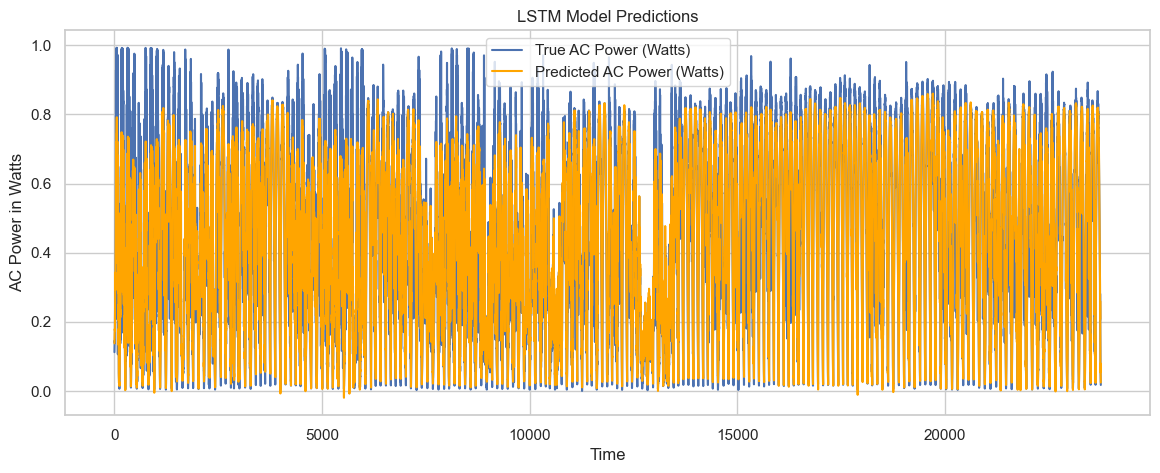

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='True AC Power (Watts)')
plt.plot(predictions, label='Predicted AC Power (Watts)', color='orange')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('AC Power in Watts')
plt.legend()
plt.show()


In [60]:
date_column = data1['DATE_TIME']  # Replace 'DAta_time' with the actual name if different
practis = data1.drop(columns=['DATE_TIME'])
# Apply MinMaxScaler on numeric columns only
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(practis)
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data.iloc[i:i + sequence_length, :-1])  # Excluding target from inputs
        y.append(data.iloc[i + sequence_length, -1])  # Target (AC Power in Watt, for example)
    return np.array(X), np.array(y)
sequence_length = 60  # Adjust based on time dependency
X, y = create_sequences(practis, sequence_length)
# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\ultratb.py", line 1457, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\ultratb.py", line 1348, in structured_traceback
    return VerboseTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareF

In [56]:
data1.iloc[:,1:4]

,IRRADIATION,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE
DATE_TIME,,,
2020-05-15 00:00:00,0.0,25.184316,22.857507
2020-05-15 00:00:00,0.0,25.184316,22.857507
2020-05-15 00:00:00,0.0,25.184316,22.857507
2020-05-15 00:00:00,0.0,25.184316,22.857507
2020-05-15 00:00:00,0.0,25.184316,22.857507
...,...,...,...
2020-06-17 23:45:00,0.0,21.909288,20.427972
2020-06-17 23:45:00,0.0,21.909288,20.427972
2020-06-17 23:45:00,0.0,21.909288,20.427972
